In [66]:
import pandas as pd
import numpy as np
import geohash as gh

In [67]:
data = pd.read_csv('training.csv')

In [68]:
data.head(10)

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468
5,qp03tu,1,12:15,0.023843
6,qp096d,25,3:30,0.007460
7,qp03nr,51,20:45,0.000293
8,qp093r,48,6:15,0.054170
9,qp03r2,4,22:15,0.123463


In [69]:
data.isnull().sum()

geohash6     0
day          0
timestamp    0
demand       0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB


In [71]:
data.shape

(4206321, 4)

In [72]:
data['geohash6'] = data.apply(lambda x: gh.decode(x['geohash6']), axis=1)

In [73]:
data.head()

,geohash6,day,timestamp,demand
0,"(-5.35308837890625, 90.6536865234375)",18,20:0,0.020072
1,"(-5.41351318359375, 90.6646728515625)",10,14:30,0.024721
2,"(-5.32562255859375, 90.9063720703125)",9,6:15,0.102821
3,"(-5.35308837890625, 90.7525634765625)",32,5:0,0.088755
4,"(-5.41351318359375, 90.7196044921875)",15,4:0,0.074468


In [74]:
data['geohash6'] = data['geohash6'].apply(str).str.replace(',','.')

In [75]:
data.head()

,geohash6,day,timestamp,demand
0,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072
1,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721
2,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821
3,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755
4,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468


In [76]:
data = data['geohash6'].str.strip('()').str.split('. ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}).join(data)

In [77]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468


In [78]:
mask = (pd.to_timedelta(data['timestamp'] + ':00').between(pd.Timedelta('6h'), pd.Timedelta('18h')))
data['Day-Night'] = np.where(mask, 'Day', 'Night')

In [79]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data['Day-Night'].value_counts()

Day      2296529
Night    1909792
Name: Day-Night, dtype: int64

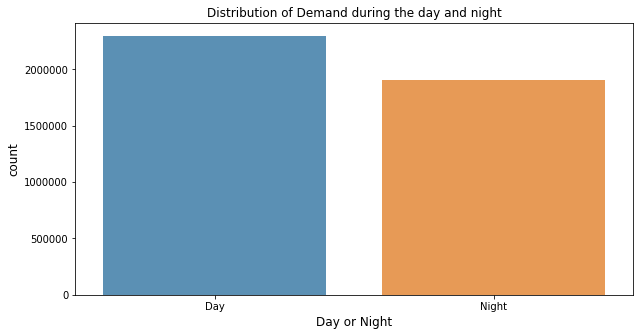

In [82]:
day_night_count = data['Day-Night'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day_night_count.index, day_night_count.values, alpha=0.8)
plt.title('Distribution of Demand during the day and night')
plt.ylabel('count', fontsize=12)
plt.xlabel('Day or Night', fontsize=12)
plt.show()

In [83]:
len(data.geohash6.unique()) #number of locations in India

1329

In [84]:
#convert timestamp into hours and mins
data['hours'] = data['timestamp'].map(lambda x: int(x.split(':')[0]))
data['mins'] = data['timestamp'].map(lambda x: int(x.split(':')[1]))
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night,hours,mins
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night,20,0
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day,14,30
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day,6,15
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night,5,0
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night,4,0


In [85]:
data[['geohash6', 'demand']].groupby('geohash6').count().head(10)

,demand
geohash6,
(-5.23773193359375. 90.6427001953125),5
(-5.23773193359375. 90.6536865234375),681
(-5.23773193359375. 90.6646728515625),1669
(-5.23773193359375. 90.6756591796875),3169
(-5.23773193359375. 90.6866455078125),3759
(-5.23773193359375. 90.6976318359375),5036
(-5.23773193359375. 90.7086181640625),3772
(-5.23773193359375. 90.7196044921875),2630
(-5.23773193359375. 90.7305908203125),3752


In [86]:
data['time'] = 24*60*(data['day']-1) + 60*data['hours'] + data['mins']

In [87]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night,hours,mins,time
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night,20,0,25680
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day,14,30,13830
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day,6,15,11895
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night,5,0,44940
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night,4,0,20400


In [88]:
max_day = data.day.max()
max_time = data.time.max()
train_start = data[data.day==61-13].index[0]
test_start = data[data.time==max_time-15*4].index[0]

X_train = data[['time', 'Latitude','Longitude']].iloc[train_start:test_start,:]
X_test = data[['time', 'Latitude','Longitude']].iloc[test_start:,:]

y_train = data.demand.iloc[train_start:test_start]
y_test = data.demand.iloc[test_start:]

In [102]:
X_test

,time,Latitude,Longitude
7913,87765,-5.32012939453125,90.8843994140625
7914,2595,-5.36407470703125,90.8074951171875
7915,70665,-5.37506103515625,90.9173583984375
7916,18090,-5.35858154296875,90.6427001953125
7917,38265,-5.30364990234375,90.6427001953125
7918,40785,-5.24871826171875,90.8294677734375
7919,11280,-5.36956787109375,90.5987548828125
7920,14595,-5.41351318359375,90.7196044921875
7921,36210,-5.27618408203125,90.9173583984375
7922,3105,-5.39154052734375,90.7305908203125


In [89]:
max_day

61

In [90]:
max_time

87825

In [103]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7905, 3)
(4198408, 3)
(7905,)
(4198408,)


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=30, max_depth=40)
model.fit(X_train, y_train)
ytest_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ytest_pred))
print('RMSE:',rmse)

RMSE: 0.11543288943907239


In [104]:
predicted = pd.DataFrame(ytest_pred)

In [111]:
prediction = X_test.join(predicted)

In [112]:
# predicted_data = predicted.join(X_test)

In [113]:
prediction.rename(columns={0: 'Predicted_Demand'}, inplace=True)

In [115]:
prediction.head()

,time,Latitude,Longitude,Predicted_Demand
7913,87765,-5.32012939453125,90.8843994140625,0.023257
7914,2595,-5.36407470703125,90.8074951171875,0.069992
7915,70665,-5.37506103515625,90.9173583984375,0.047025
7916,18090,-5.35858154296875,90.6427001953125,0.048030
7917,38265,-5.30364990234375,90.6427001953125,0.136631


In [116]:
print(predicted_data['Predicted_Demand'].max())

0.9785402335442122


In [117]:
print(predicted_data['Predicted_Demand'].min())

0.0013500920920164763


In [118]:
predicted_data['Predicted_Demand'].unique()

array([0.50805524, 0.21813937, 0.12691679, ..., 0.16971895, 0.12792814,
       0.01798046])

In [119]:
predicted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198408 entries, 0 to 4198407
Data columns (total 4 columns):
Predicted_Demand    float64
time                float64
Latitude            object
Longitude           object
dtypes: float64(2), object(2)
memory usage: 128.1+ MB


In [124]:
predicted_data['time'].value_counts()

55260.0    1072
55320.0    1058
55305.0    1058
55290.0    1052
55245.0    1051
55275.0    1049
55350.0    1035
55230.0    1034
55335.0    1032
43755.0    1032
55365.0    1029
75420.0    1027
75405.0    1023
86745.0    1021
43785.0    1018
59580.0    1018
59610.0    1014
59595.0    1014
55215.0    1014
85260.0    1013
59625.0    1013
75510.0    1011
75480.0    1011
59640.0    1011
65070.0    1010
75465.0    1010
59565.0    1010
86760.0    1010
85245.0    1009
55005.0    1008
           ... 
29985.0     251
48675.0     251
50145.0     251
18420.0     251
18450.0     250
78915.0     250
8355.0      249
31365.0     249
38565.0     249
81780.0     248
48705.0     247
81795.0     246
38595.0     245
28485.0     244
80355.0     244
29970.0     243
31410.0     241
25275.0     240
8385.0      238
18465.0     238
81810.0     237
25290.0     236
8370.0      236
25305.0     232
31425.0     232
25320.0     230
25260.0     160
25050.0      23
25110.0       3
25125.0       1
Name: time, Length: 5847

In [ ]:
hours = data['time'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(hours.index, hours.values, alpha=0.8)
plt.title('Distribution of Demand over time')
plt.ylabel('count', fontsize=12)
plt.xlabel('time', fontsize=12)
plt.show()